In [85]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path

# --- Locate and add the package root (GITTYSBURG) ---
# Adjust dynamically from current working directory
cwd = Path.cwd().resolve()
for parent in [cwd, *cwd.parents]:
    if (parent / "sociopathit").exists():
        ROOT = parent
        break
else:
    raise FileNotFoundError("❌ Could not locate the sociopathit package root.")

# Add to sys.path for imports
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

# Verify
print(f"✅ Added to sys.path:\n{ROOT}")


✅ Added to sys.path:
C:\Users\alecw\OneDrive - University of Toronto\Directives\GITTYSBURG\sociopathit


# Bar Charts

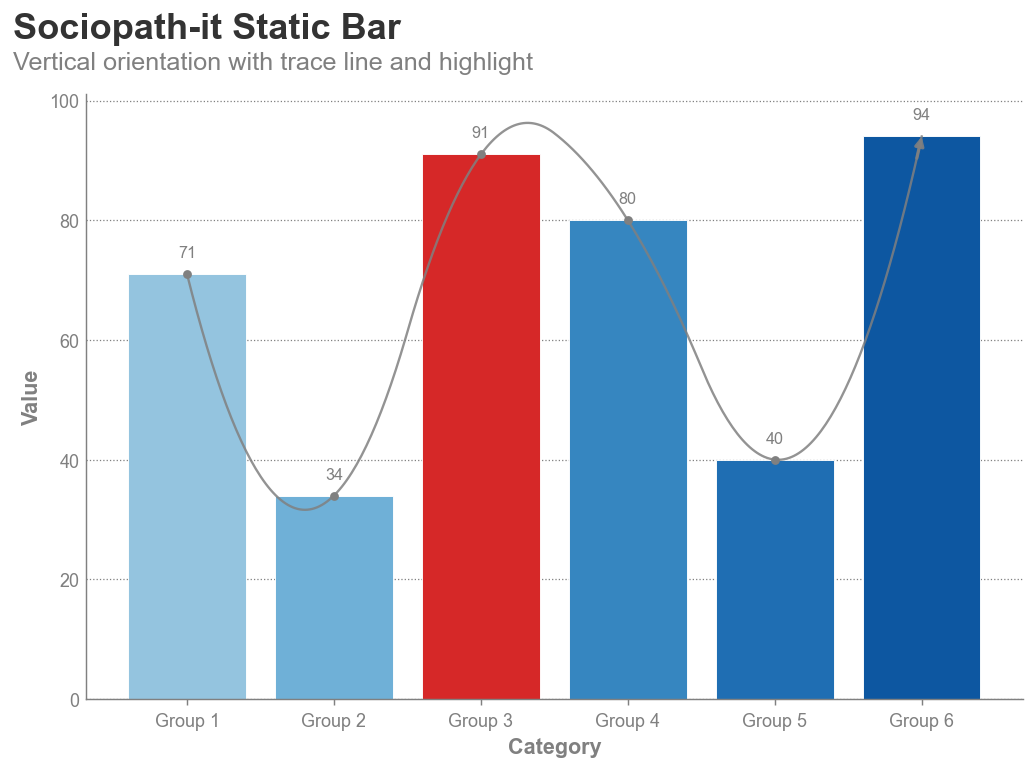

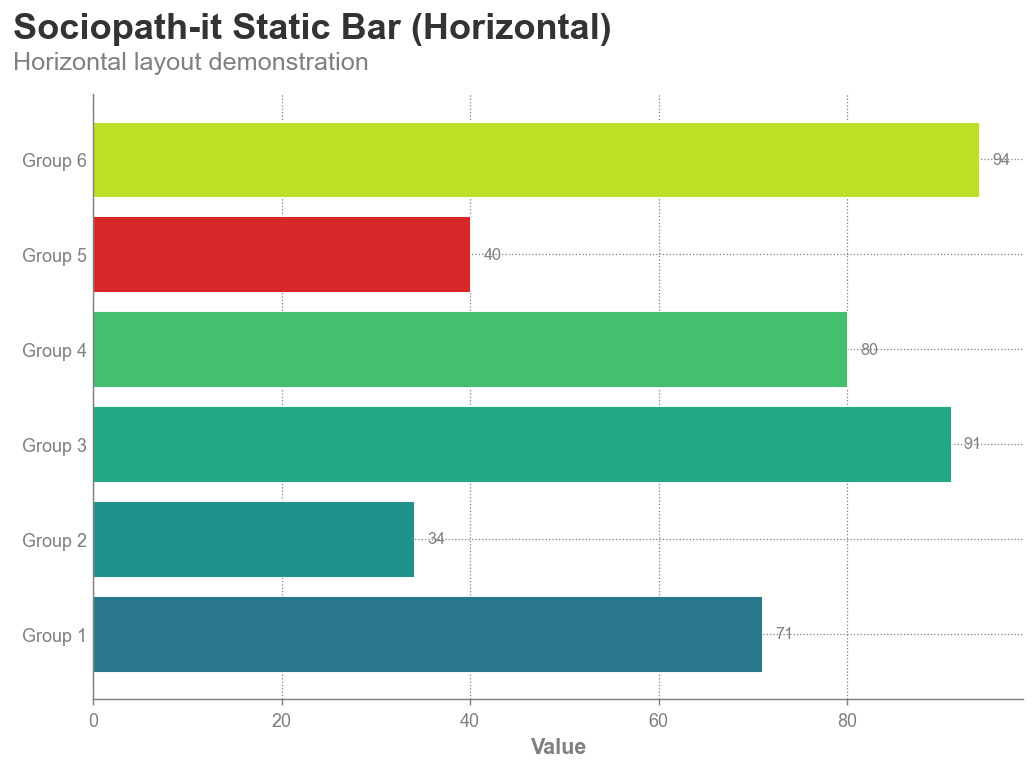

In [95]:
import importlib
from sociopathit.visuals import bar as bar_module
importlib.reload(bar_module)
from sociopathit.visuals.bar import bar, bar_interactive

# Simulate categorical data
np.random.seed(42)
df_test = pd.DataFrame({
    "Category": [f"Group {i}" for i in range(1, 7)],
    "Value": np.random.randint(20, 100, size=6)
})

# ─────────────────────────────────────────────
# Test 1: Static vertical bar
# ─────────────────────────────────────────────
bar(
    df=df_test,
    x="Category",
    y="Value",
    title="Sociopath-it Static Bar",
    subtitle="Vertical orientation with trace line and highlight",
    style_mode="plainjane",
    orientation="vertical",
    trace_line=True,
    trace_arrow=True,
    highlight="Group 3"
)

# ─────────────────────────────────────────────
# Test 2: Static horizontal bar
# ─────────────────────────────────────────────
bar(
    df=df_test,
    x="Category",
    y="Value",
    title="Sociopath-it Static Bar (Horizontal)",
    subtitle="Horizontal layout demonstration",
    orientation="horizontal",
    highlight="Group 5"
)

# ─────────────────────────────────────────────
# Test 3: Interactive bar
# ─────────────────────────────────────────────
fig = bar_interactive(
    df=df_test,
    x="Category",
    y="Value",
    title="Sociopath-it Interactive Bar",
    subtitle="Hover-enabled and highlight example",
    highlight="Group 4"
)
fig.show()

# Cluster Mapping

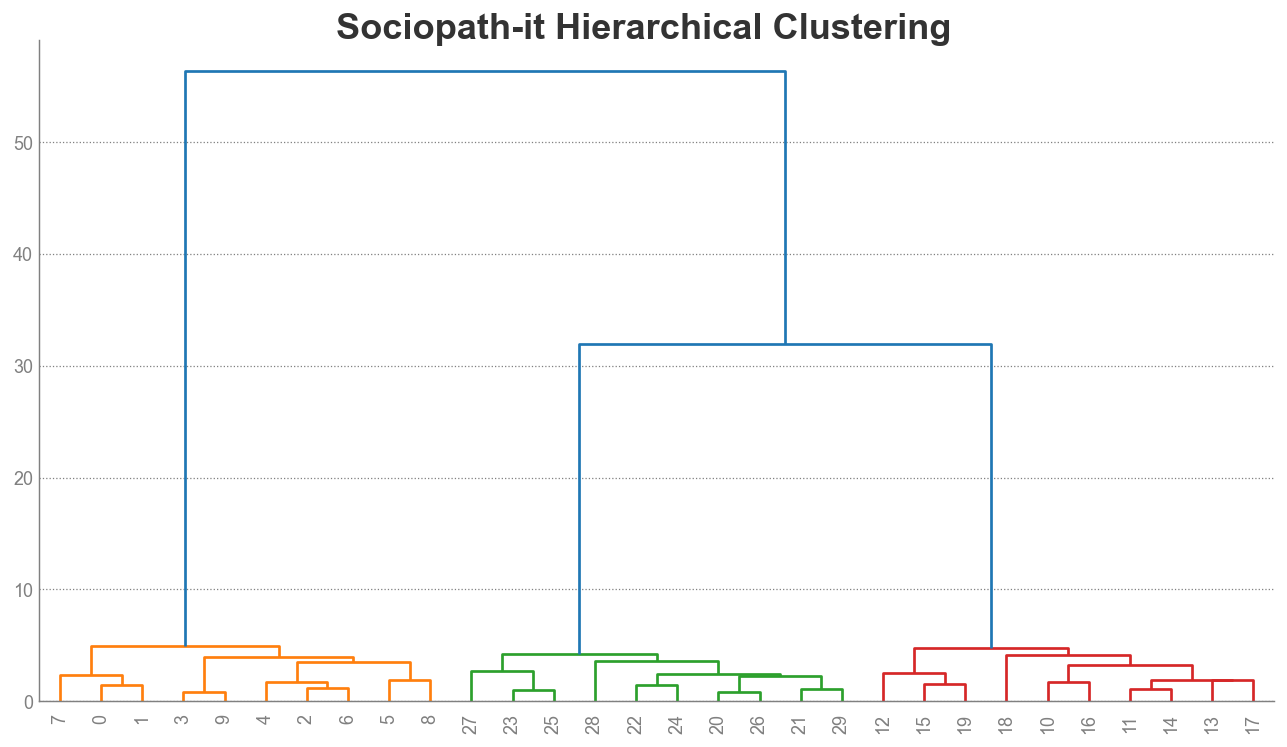

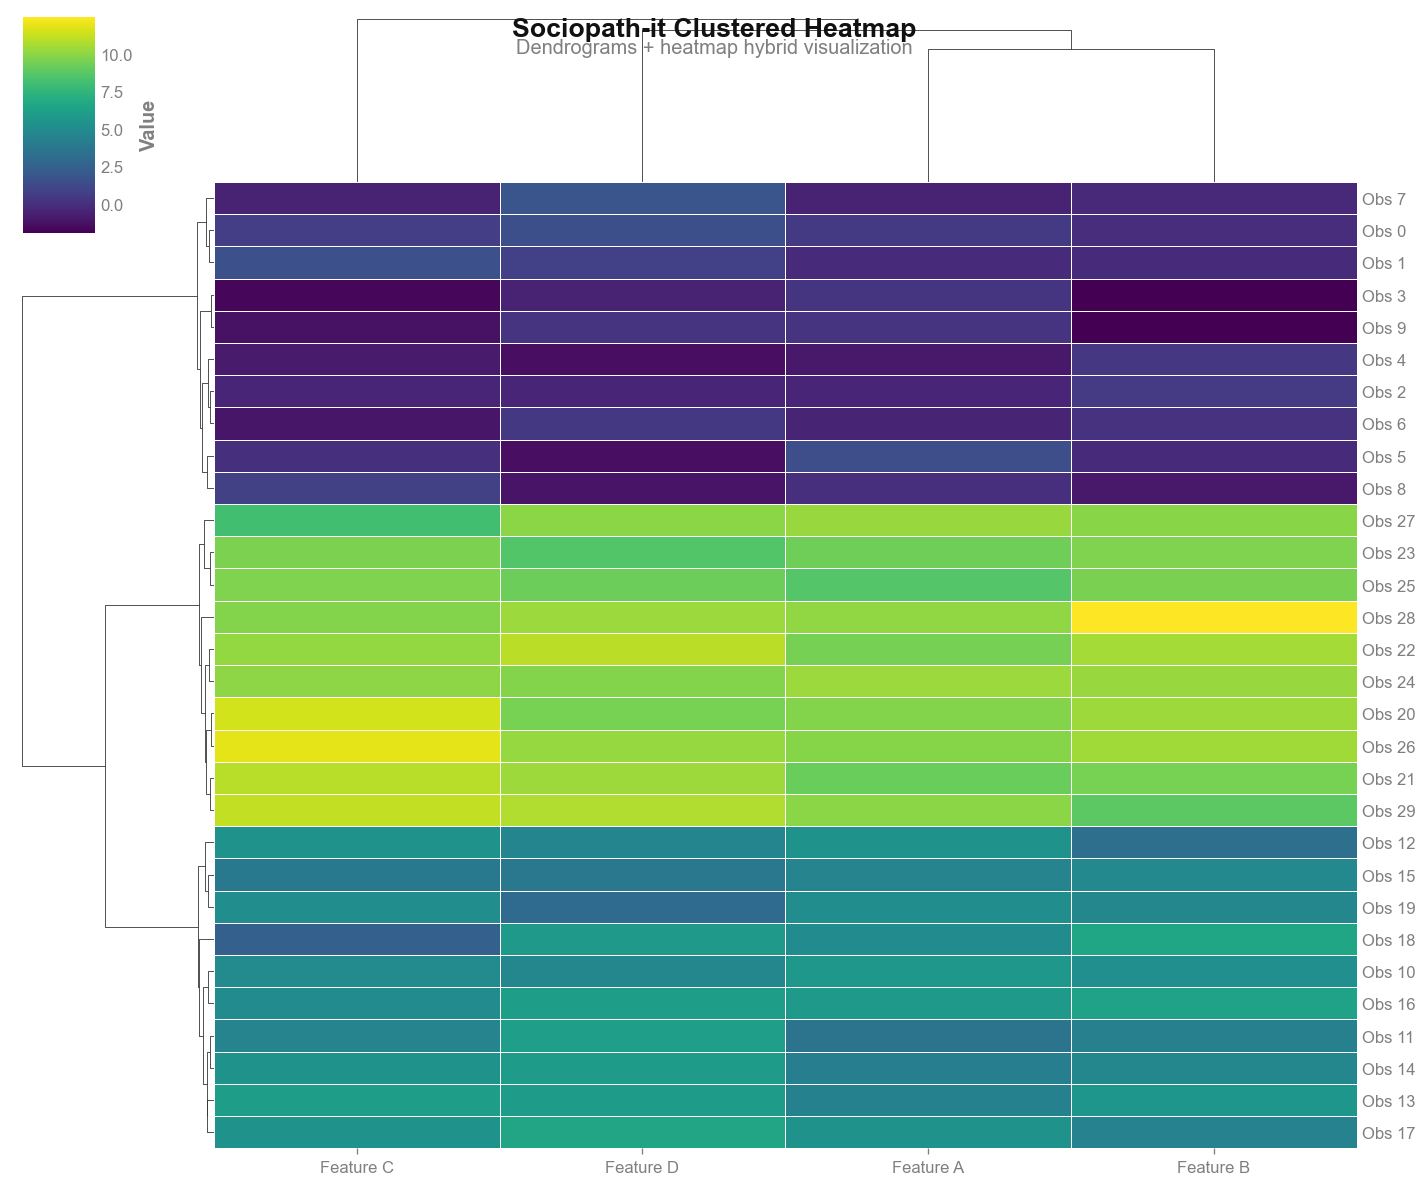

(<Figure size 1440x1200 with 4 Axes>, <Axes: >)

In [97]:
import pandas as pd
import numpy as np
import importlib
from sociopathit.visuals import cluster as cluster_module
importlib.reload(cluster_module)
from sociopathit.visuals.cluster import cluster, cluster_interactive, heatmap_cluster

# Simulate clustered numeric data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=0.0, scale=1.0, size=(10, 4)),
    np.random.normal(loc=5.0, scale=1.0, size=(10, 4)),
    np.random.normal(loc=10.0, scale=1.0, size=(10, 4)),
])
df_cluster = pd.DataFrame(data, columns=["Feature A", "Feature B", "Feature C", "Feature D"])
df_cluster.index = [f"Obs {i}" for i in range(len(df_cluster))]

# ─────────────────────────────────────────────
# Test 1: Static cluster dendrogram
# ─────────────────────────────────────────────
cluster(
    df=df_cluster,
    method="ward",
    metric="euclidean",
    color_threshold=15,
    title="Sociopath-it Hierarchical Clustering",
)

# ─────────────────────────────────────────────
# Test 2: Interactive version
# ─────────────────────────────────────────────
fig = cluster_interactive(
    df=df_cluster,
    method="average",
    metric="euclidean",
    title="Interactive Sociopath-it Cluster Dendrogram",
    subtitle="Average linkage example",
)
fig.show()

# ─────────────────────────────────────────────
# Test 3: NEW Heatmap-Cluster Hybrid
# ─────────────────────────────────────────────
heatmap_cluster(
    df=df_cluster,
    method="ward",
    metric="euclidean",
    title="Sociopath-it Clustered Heatmap",
    subtitle="Dendrograms + heatmap hybrid visualization",
    style_mode="viridis",
    cmap="viridis",
    annot=False,
    figsize=(12, 10),
)

# Coefficient Plot

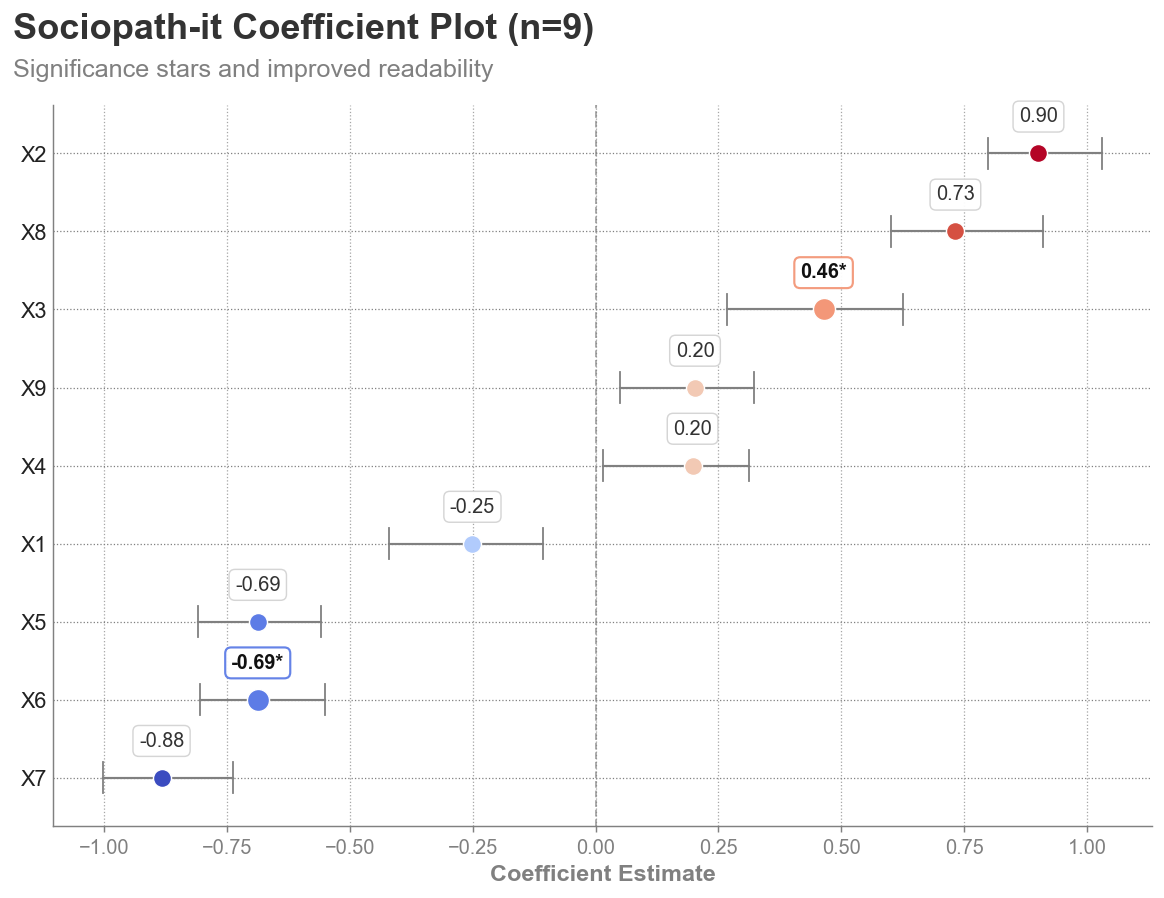

In [98]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import coef as coef_module

importlib.reload(coef_module)
from sociopathit.visuals.coef import coef, coef_interactive

np.random.seed(42)
terms = [f"X{i}" for i in range(1, 10)]
est = np.random.uniform(-1.0, 1.0, len(terms))
lo = est - np.random.uniform(0.1, 0.2, len(terms))
hi = est + np.random.uniform(0.1, 0.2, len(terms))
pvals = np.random.uniform(0.001, 0.3, len(terms))
groups = ["Set A"] * 3 + ["Set B"] * 3 + ["Set C"] * 3

df_coef = pd.DataFrame({
    "term": terms,
    "estimate": est,
    "conf.low": lo,
    "conf.high": hi,
    "p.value": pvals,
    "group": groups,
})

coef(
    df=df_coef,
    group_col="group",
    p_col="p.value",
    ci_style="bracket",
    color_mode="continuous",
    title="Sociopath-it Coefficient Plot",
    subtitle="Significance stars and improved readability",
)

fig = coef_interactive(
    df=df_coef,
    group_col="group",
    p_col="p.value",
    ci_style="spike",
    color_mode="continuous",
    title="Interactive Sociopath-it Coefficient Plot",
    subtitle="Bold significant coefs with stars",
)
fig.show()

# Co-Occurrence Networks

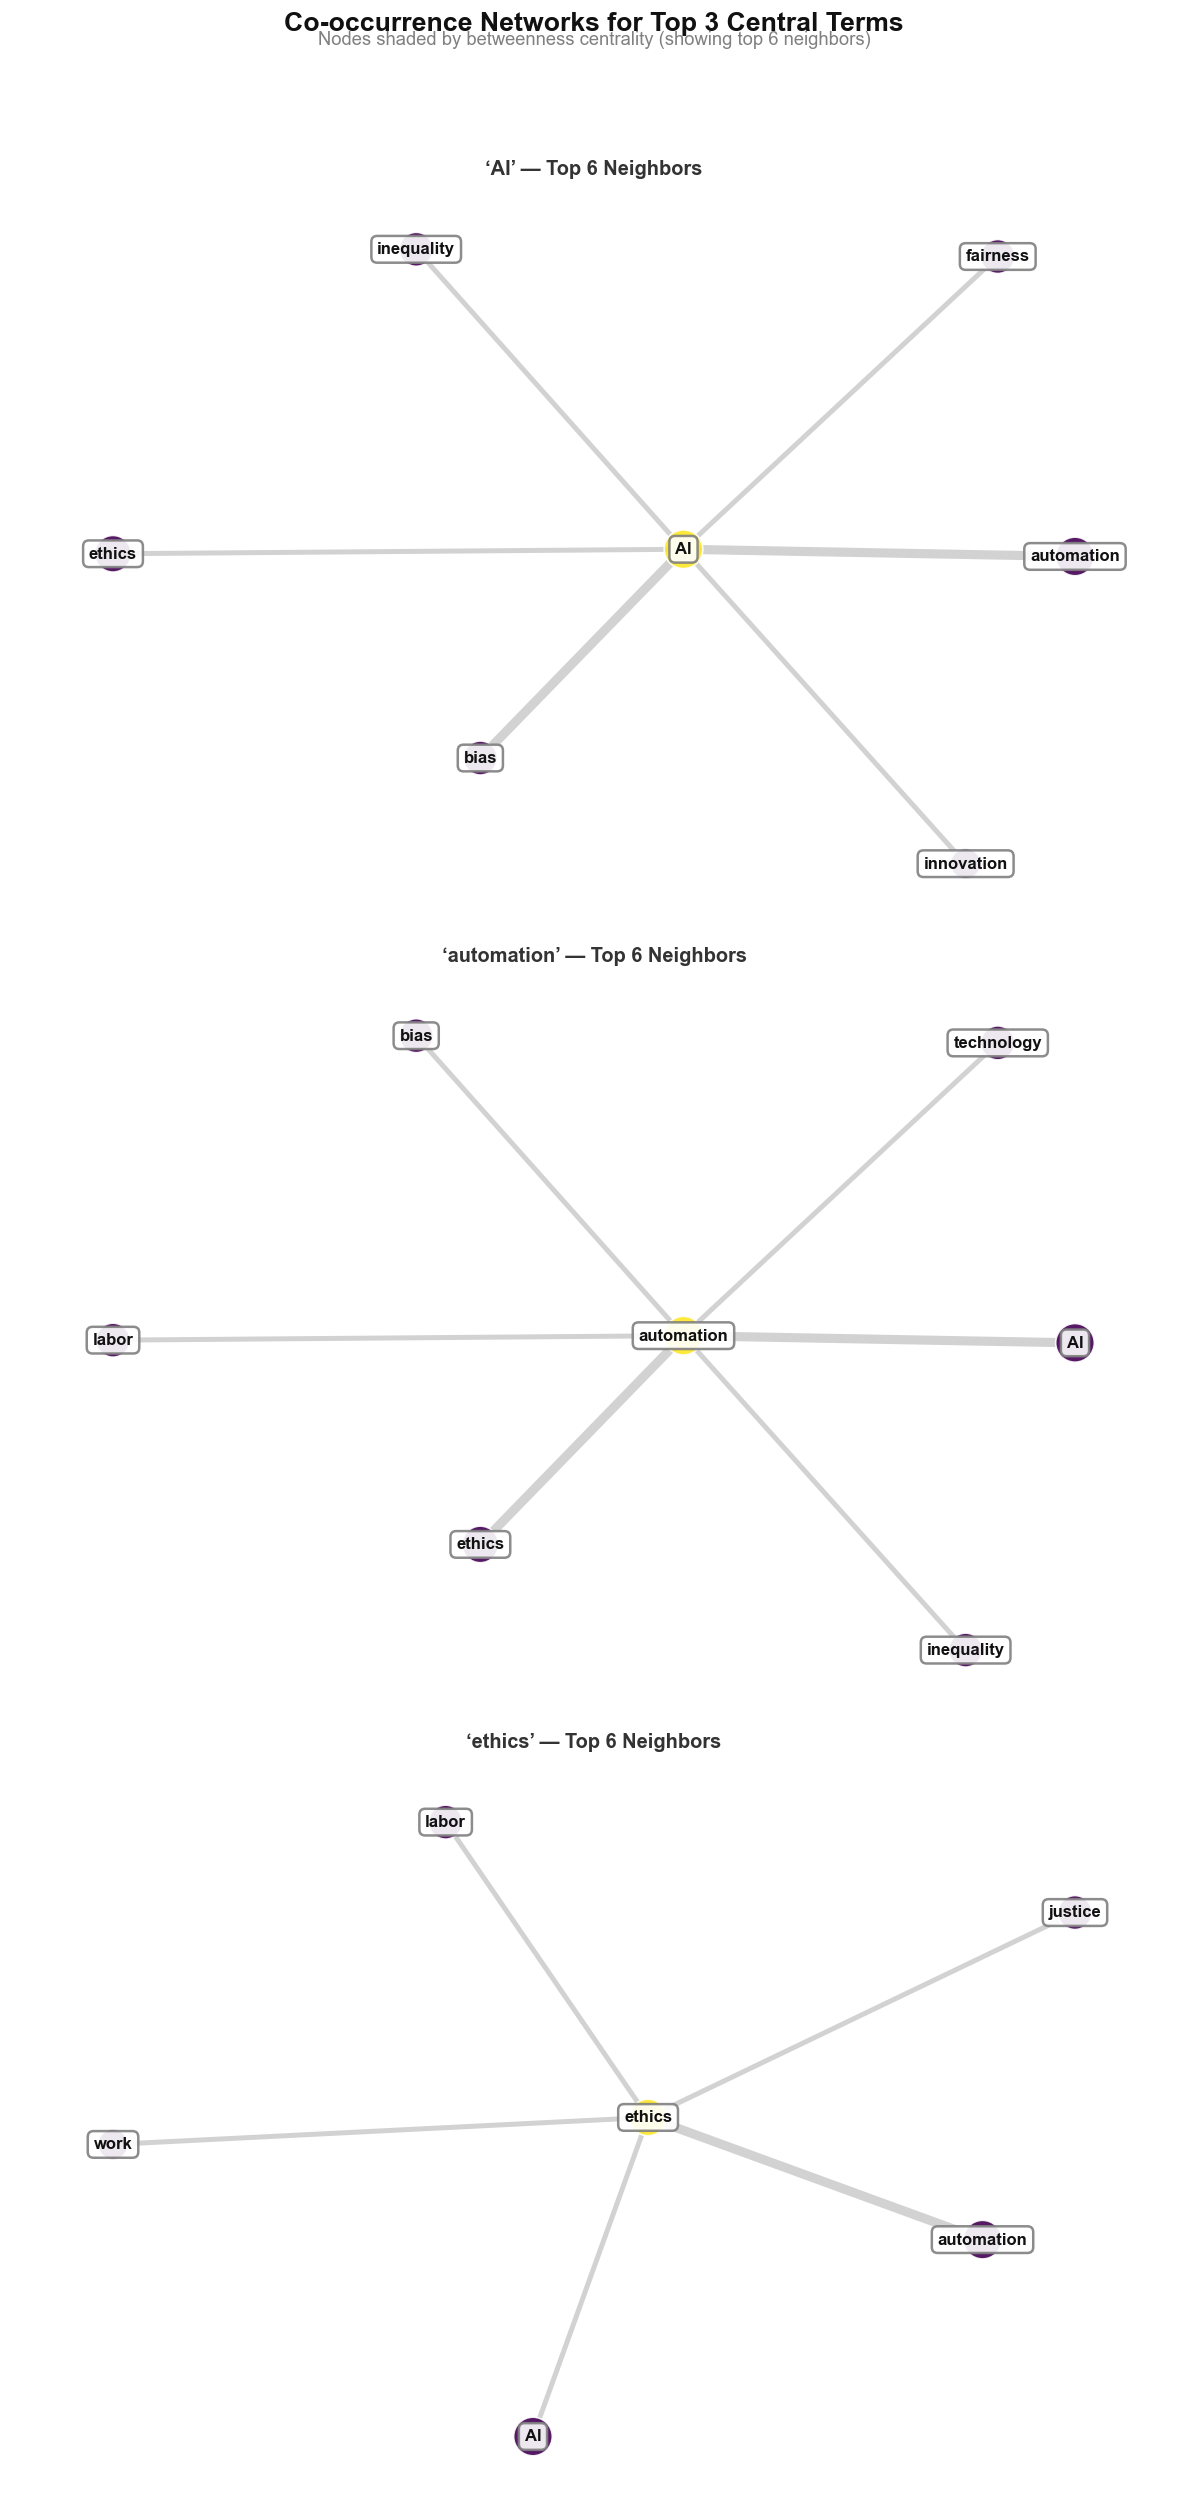

In [99]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import cooccur as cooccur_module

importlib.reload(cooccur_module)
from sociopathit.visuals.cooccur import cooccur, cooccur_interactive

# Example dataset
data = {
    "keywords": [
        "AI, automation, ethics",
        "technology, labor, automation",
        "AI, fairness, bias",
        "inequality, justice, fairness",
        "AI, inequality, automation, bias",
        "ethics, work, automation",
        "labor, justice, ethics",
        "AI, technology, innovation",
    ]
}
df_terms = pd.DataFrame(data)

# ─────────────────────────────────────────────
# Static version
# ─────────────────────────────────────────────
cooccur(
    df=df_terms,
    term_col="keywords",
    top_n=3,
    max_neighbors=6,
    style="reviewer3",
)

# ─────────────────────────────────────────────
# Interactive version
# ─────────────────────────────────────────────
fig = cooccur_interactive(
    df=df_terms,
    term_col="keywords",
    top_n=3,
    max_neighbors=5,
)
fig.show()


# Factor Mapping

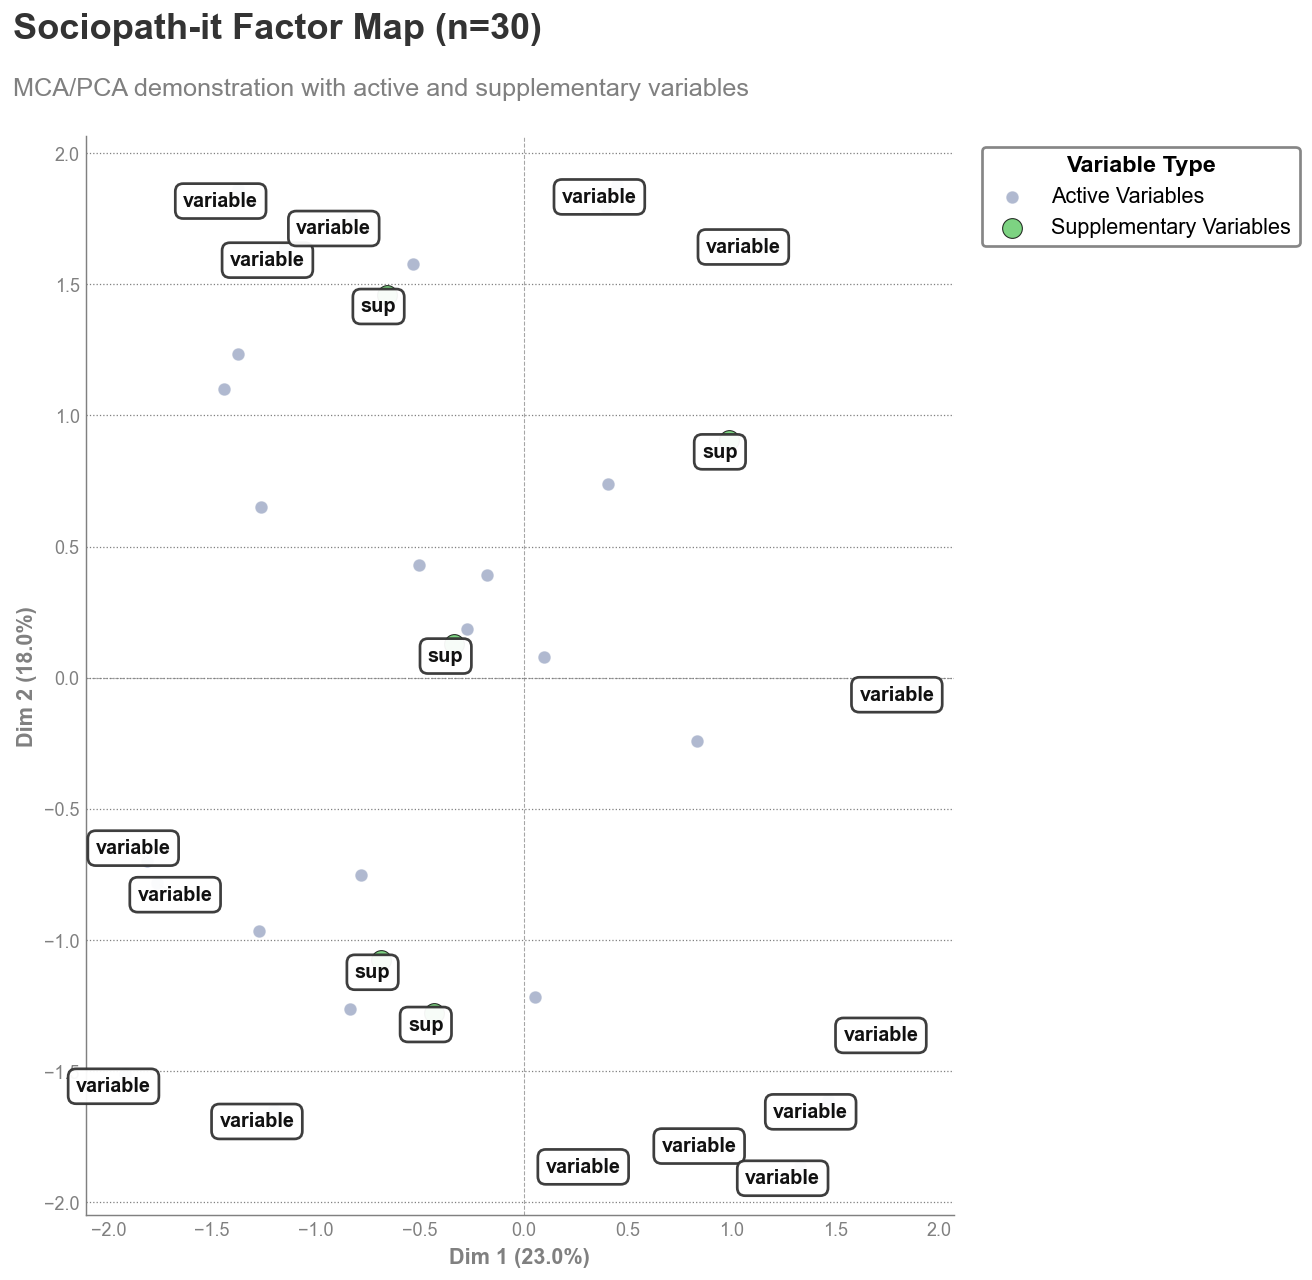

In [100]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import factormap as factormap_module

importlib.reload(factormap_module)
from sociopathit.visuals.factormap import factormap, factormap_interactive

# Simulate 2D factor analysis coordinates
np.random.seed(42)
n_vars = 30
active_coords = pd.DataFrame({
    0: np.random.uniform(-2, 2, n_vars),
    1: np.random.uniform(-2, 2, n_vars),
}, index=[f"Variable_{i}" for i in range(n_vars)])

sup_coords = pd.DataFrame({
    0: np.random.uniform(-1.5, 1.5, 5),
    1: np.random.uniform(-1.5, 1.5, 5),
}, index=[f"Sup_{i}" for i in range(5)])

# ─────────────────────────────────────────────
# Test 1: UPDATED Static factor map with improved legend
# ─────────────────────────────────────────────
factormap(
    active_coords=active_coords,
    sup_coords=sup_coords,
    title="Sociopath-it Factor Map",
    subtitle="MCA/PCA demonstration with active and supplementary variables",
    style_mode="viridis",
    label_filter=15,
    perc_var=(0.23, 0.18),
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive version
# ─────────────────────────────────────────────
fig = factormap_interactive(
    active_coords=active_coords,
    sup_coords=sup_coords,
    title="Interactive Sociopath-it Factor Map",
    subtitle="Hover for variable details",
    style_mode="sentiment",
    label_filter=15,
    perc_var=(0.23, 0.18),
)
fig.show()

# Heatmap

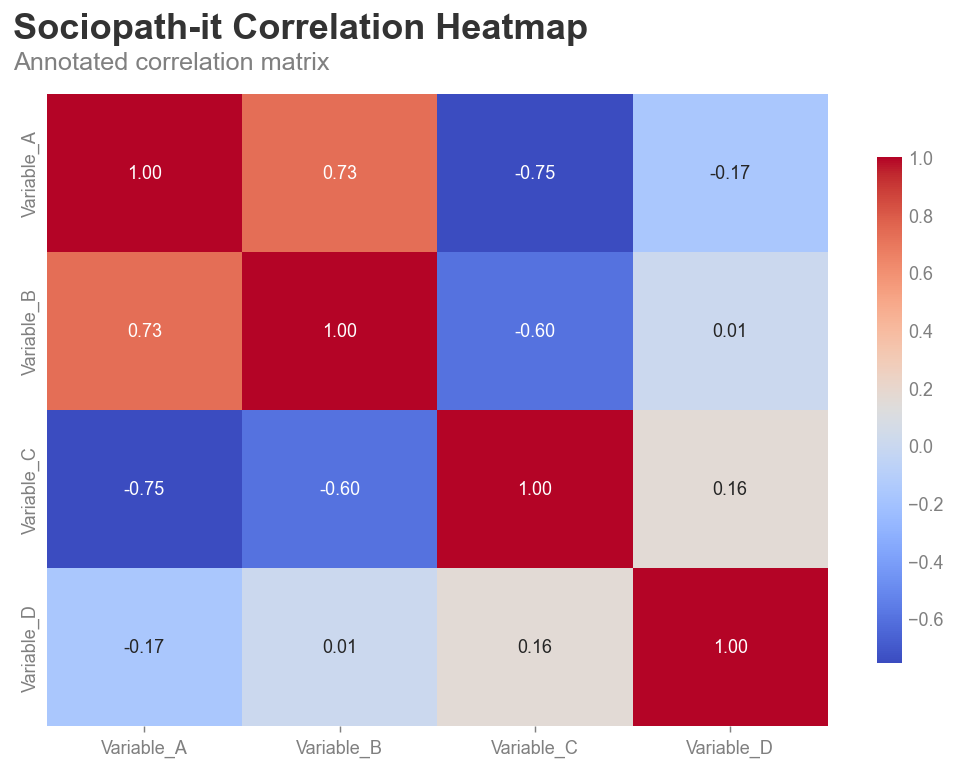

In [101]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import heatmap as heatmap_module

importlib.reload(heatmap_module)
from sociopathit.visuals.heatmap import heatmap, heatmap_interactive

# Simulate correlated numeric data
np.random.seed(42)
n_samples = 100
df_heat = pd.DataFrame({
    "Variable_A": np.random.normal(0, 1, n_samples),
    "Variable_B": np.random.normal(0, 1, n_samples),
    "Variable_C": np.random.normal(0, 1, n_samples),
    "Variable_D": np.random.normal(0, 1, n_samples),
})
df_heat["Variable_B"] = df_heat["Variable_A"] * 0.7 + np.random.normal(0, 0.5, n_samples)
df_heat["Variable_C"] = df_heat["Variable_A"] * -0.5 + np.random.normal(0, 0.5, n_samples)

# ─────────────────────────────────────────────
# Test 1: Static correlation heatmap
# ─────────────────────────────────────────────
heatmap(
    df=df_heat,
    title="Sociopath-it Correlation Heatmap",
    subtitle="Annotated correlation matrix",
    cmap="coolwarm",
    annot=True,
    style_mode="plainjane",
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive heatmap
# ─────────────────────────────────────────────
fig = heatmap_interactive(
    df=df_heat,
    title="Interactive Sociopath-it Heatmap",
    subtitle="Hover for correlation values",
    cmap="viridis",
)
fig.show()

# Histogram

In [102]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import hist as hist_module

importlib.reload(hist_module)
from sociopathit.visuals.hist import histogram, histogram_interactive

# Simulate continuous distribution
np.random.seed(42)
df_hist = pd.DataFrame({
    "scores": np.random.normal(loc=50, scale=15, size=500),
    "group": np.random.choice(["A", "B"], size=500)
})

# ─────────────────────────────────────────────
# Test 1: Basic histogram with legend
# ─────────────────────────────────────────────
histogram(
    df=df_hist,
    x="scores",
    bins=25,
    title="Sociopath-it Histogram",
    subtitle="Normal distribution example",
    style_mode="sentiment",
    show_legend=True,
)

# ─────────────────────────────────────────────
# Test 2: NEW Enhanced histogram with trace outline and thresholds
# ─────────────────────────────────────────────
histogram(
    df=df_hist,
    x="scores",
    bins=25,
    title="Enhanced Histogram with Trace and Thresholds",
    subtitle="Showing trace outline and threshold lines",
    style_mode="viridis",
    trace_outline=True,
    thresholds=[40, 60],
    show_legend=True,
)

# ─────────────────────────────────────────────
# Test 3: NEW Two-variable coloring
# ─────────────────────────────────────────────
histogram(
    df=df_hist,
    x="scores",
    bins=25,
    color_by="group",
    title="Two-Variable Histogram",
    subtitle="Colored by group membership",
    style_mode="plainjane",
    show_legend=True,
)

# ─────────────────────────────────────────────
# Test 4: NEW Interactive version
# ─────────────────────────────────────────────
fig = histogram_interactive(
    df=df_hist,
    x="scores",
    bins=25,
    title="Interactive Sociopath-it Histogram",
    subtitle="Hover for bin details",
    style_mode="fiery",
)
fig.show()

SyntaxError: unexpected character after line continuation character (hist.py, line 231)

# Pie Chart

In [ ]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import pie as pie_module

importlib.reload(pie_module)
from sociopathit.visuals.pie import pie, pie_interactive

# Simulate categorical data
np.random.seed(42)
categories = ["Category A", "Category B", "Category C", "Category D", "Category E"]
df_pie = pd.DataFrame({
    "category": np.random.choice(categories, size=200, p=[0.3, 0.25, 0.2, 0.15, 0.1])
})

# ─────────────────────────────────────────────
# Test 1: Static pie chart
# ─────────────────────────────────────────────
pie(
    df=df_pie,
    category_col="category",
    title="Sociopath-it Pie Chart",
    subtitle="Category distribution with auto-collapse",
    style_mode="fiery",
    min_pct=0.05,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive pie chart
# ─────────────────────────────────────────────
fig = pie_interactive(
    df=df_pie,
    category_col="category",
    title="Interactive Sociopath-it Pie Chart",
    subtitle="Hover for category details",
    style_mode="sentiment",
    min_pct=0.05,
)
fig.show()

# Scatter Plot

In [ ]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import scatter as scatter_module

importlib.reload(scatter_module)
from sociopathit.visuals.scatter import scatterplot, scatterplot_interactive

# Simulate scatter data with groups
np.random.seed(42)
n = 150
df_scatter = pd.DataFrame({
    "x_var": np.random.normal(50, 10, n),
    "y_var": np.random.normal(50, 10, n),
    "group": np.random.choice(["Group A", "Group B", "Group C"], n)
})
df_scatter["y_var"] = df_scatter["y_var"] + 0.6 * df_scatter["x_var"] + np.random.normal(0, 5, n)

# ─────────────────────────────────────────────
# Test 1: Static scatter plot with groups
# ─────────────────────────────────────────────
scatterplot(
    df=df_scatter,
    x="x_var",
    y="y_var",
    group="group",
    title="Sociopath-it Scatter Plot",
    subtitle="Grouped scatter with regression lines and confidence intervals",
    style_mode="viridis",
    ci=True,
    line=True,
    alpha=0.7,
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive scatter plot
# ─────────────────────────────────────────────
fig = scatterplot_interactive(
    df=df_scatter,
    x="x_var",
    y="y_var",
    group="group",
    title="Interactive Sociopath-it Scatter Plot",
    subtitle="Hover for point details with regression lines",
    style_mode="plainjane",
    line=True,
)
fig.show()

# Trend Plot

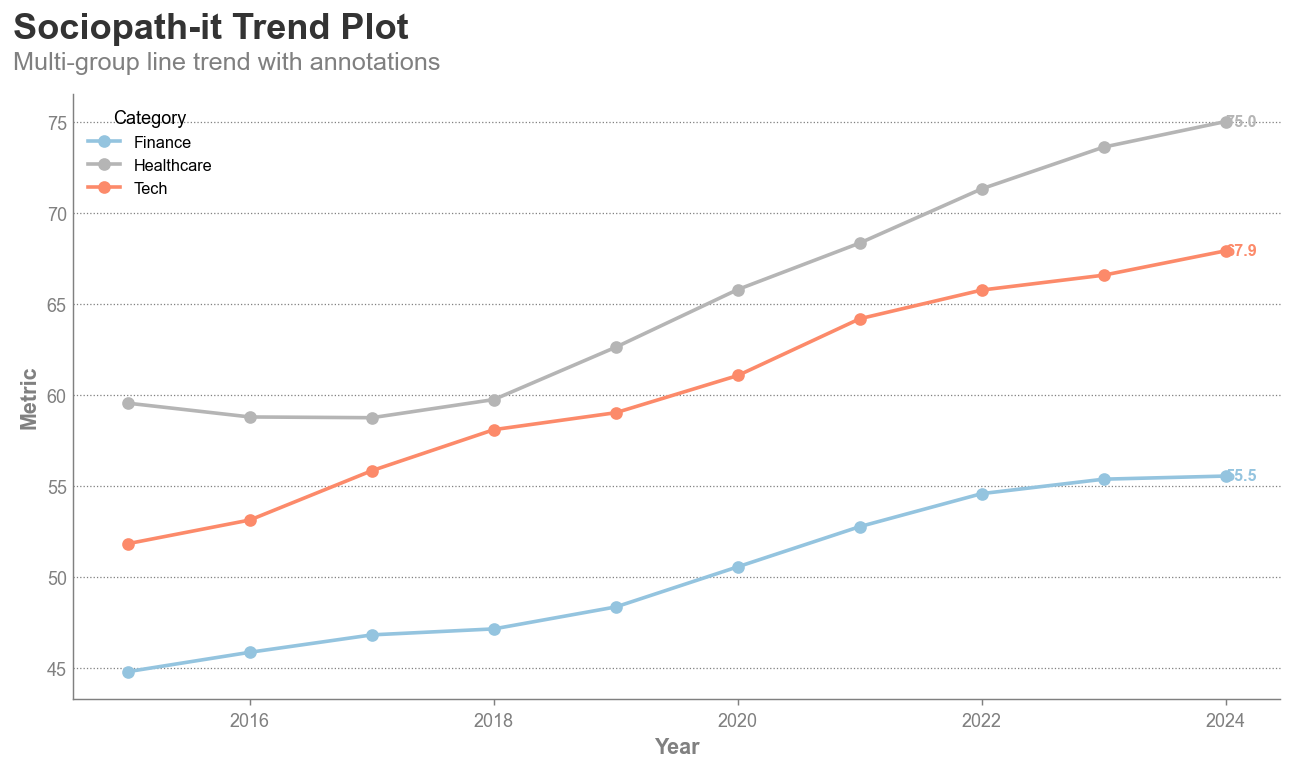

C:\Users\alecw\OneDrive - University of Toronto\Directives\GITTYSBURG\sociopathit\sociopathit\visuals\trend.py:91: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




ValueError: The palette dictionary is missing keys: {'2018', '2022', '2020', '2023', '2024', '2019', '2016', '2015', '2017', '2021'}

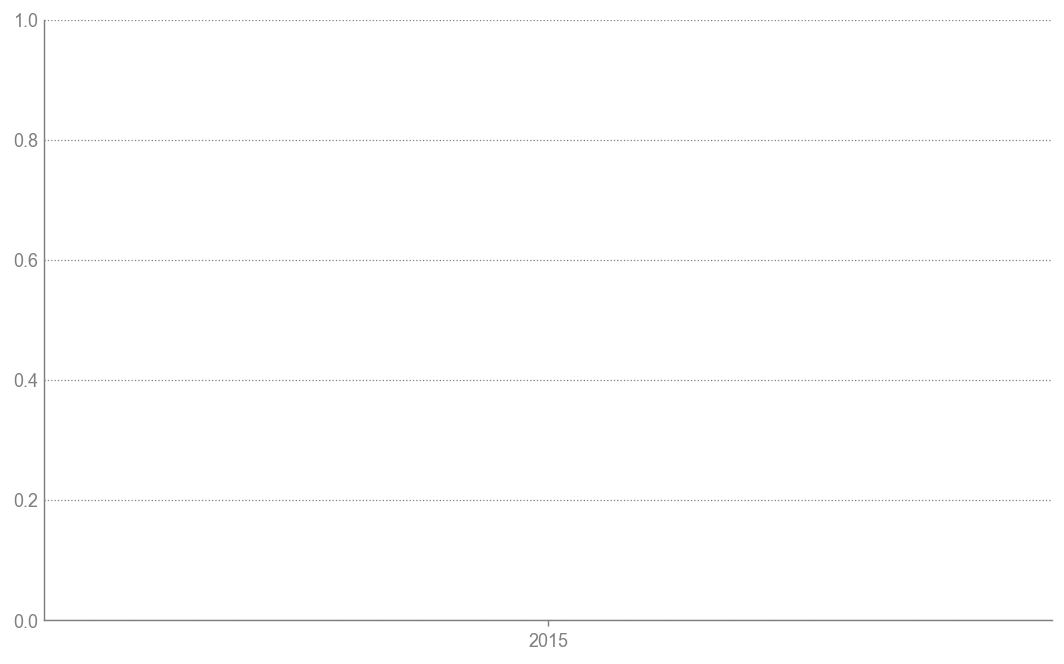

In [94]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import trend as trend_module

importlib.reload(trend_module)
from sociopathit.visuals.trend import trend, trend_interactive

# Simulate time series data
np.random.seed(42)
years = list(range(2015, 2025))
df_trend = pd.DataFrame({
    "year": years * 3,
    "metric": np.concatenate([
        50 + np.arange(10) * 2 + np.random.normal(0, 3, 10),
        45 + np.arange(10) * 1.5 + np.random.normal(0, 2, 10),
        55 + np.arange(10) * 2.5 + np.random.normal(0, 4, 10),
    ]),
    "category": ["Tech"] * 10 + ["Finance"] * 10 + ["Healthcare"] * 10,
})

# ─────────────────────────────────────────────
# Test 1: Line trend with groups
# ─────────────────────────────────────────────
trend(
    df=df_trend,
    x="year",
    y="metric",
    group="category",
    kind="line",
    title="Sociopath-it Trend Plot",
    subtitle="Multi-group line trend with annotations",
    style_mode="plainjane",
    smooth=True,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 2: Bar trend
# ─────────────────────────────────────────────
trend(
    df=df_trend[df_trend["category"] == "Tech"],
    x="year",
    y="metric",
    kind="bar",
    title="Sociopath-it Bar Trend",
    subtitle="Single category bar trend",
    style_mode="sentiment",
)

# ─────────────────────────────────────────────
# Test 3: NEW Enhanced trend with event lines and shading
# ─────────────────────────────────────────────
trend(
    df=df_trend,
    x="year",
    y="metric",
    group="category",
    kind="line",
    title="Enhanced Trend with Events and Shading",
    subtitle="Showing event markers and shaded comparison",
    style_mode="viridis",
    smooth=True,
    event_lines={2018: "Policy Change", 2021: "Market Shift"},
    shade_between=["Tech", "Finance"],
)

# ─────────────────────────────────────────────
# Test 4: NEW Trend with area fill
# ─────────────────────────────────────────────
trend(
    df=df_trend[df_trend["category"] == "Healthcare"],
    x="year",
    y="metric",
    kind="line",
    title="Trend with Area Fill",
    subtitle="Filled area under curve",
    style_mode="fiery",
    fill_area=True,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 5: NEW Interactive trend
# ─────────────────────────────────────────────
fig = trend_interactive(
    df=df_trend,
    x="year",
    y="metric",
    group="category",
    title="Interactive Sociopath-it Trend Plot",
    subtitle="Hover for data points",
    style_mode="sentiment",
)
fig.show()

# Waterfall Chart

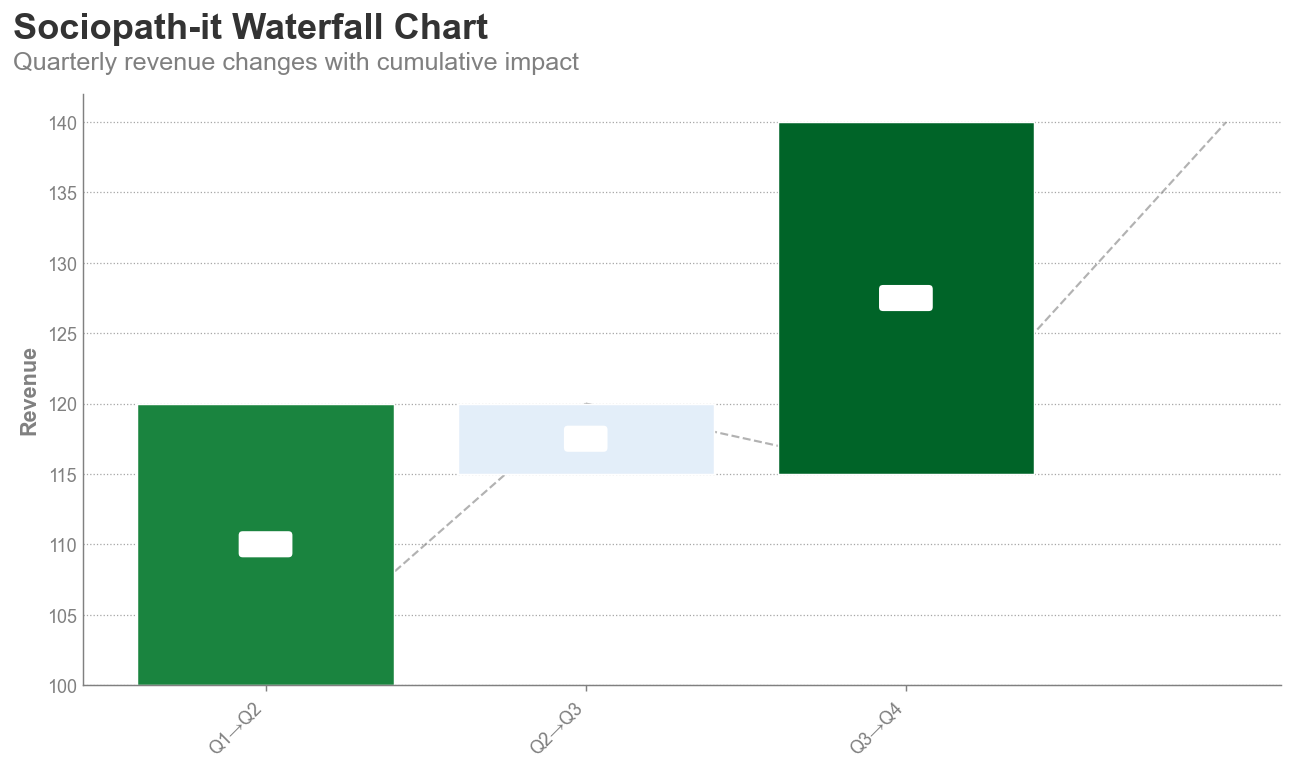

ValueError: Invalid property specified for object of type plotly.graph_objs.Waterfall: 'marker'

Did you mean "zorder"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units).
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        connector
            :class:`plotly.graph_objects.waterfall.Connector`
            instance or dict with compatible properties
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        decreasing
            :class:`plotly.graph_objects.waterfall.Decreasing`
            instance or dict with compatible properties
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.waterfall.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `initial`, `delta` and `final`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        increasing
            :class:`plotly.graph_objects.waterfall.Increasing`
            instance or dict with compatible properties
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.waterfall.Legendgrouptitle
            ` instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        measure
            An array containing types of values. By default the
            values are considered as 'relative'. However; it is
            possible to use 'total' to compute the sums. Also
            'absolute' could be applied to reset the computed total
            or to declare an initial value where needed.
        measuresrc
            Sets the source reference on Chart Studio Cloud for
            `measure`.
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.waterfall.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textinfo
            Determines which trace information appear on the graph.
            In the case of having multiple waterfalls, totals are
            computed separately (per trace).
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `initial`, `delta`, `final` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        totals
            :class:`plotly.graph_objects.waterfall.Totals` instance
            or dict with compatible properties
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        zorder
            Sets the layer on which this trace is displayed,
            relative to other SVG traces on the same subplot. SVG
            traces with higher `zorder` appear in front of those
            with lower `zorder`.
        
Did you mean "zorder"?

Bad property path:
marker
^^^^^^

In [93]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import waterfall as waterfall_module

importlib.reload(waterfall_module)
from sociopathit.visuals.waterfall import waterfall, waterfall_interactive

# Simulate cumulative impact data
df_waterfall = pd.DataFrame({
    "stage": ["Q1", "Q2", "Q3", "Q4"],
    "revenue": [100, 120, 115, 140]
})

# ─────────────────────────────────────────────
# Test 1: UPDATED Waterfall with connector lines
# ─────────────────────────────────────────────
waterfall(
    df=df_waterfall,
    x="stage",
    y="revenue",
    title="Sociopath-it Waterfall Chart",
    subtitle="Quarterly revenue changes with cumulative impact",
    style_mode="reviewer3",
    connector_lines=True,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive waterfall
# ─────────────────────────────────────────────
fig = waterfall_interactive(
    df=df_waterfall,
    x="stage",
    y="revenue",
    title="Interactive Sociopath-it Waterfall",
    subtitle="Hover for detailed changes"
)
fig.show()

# Word Cloud

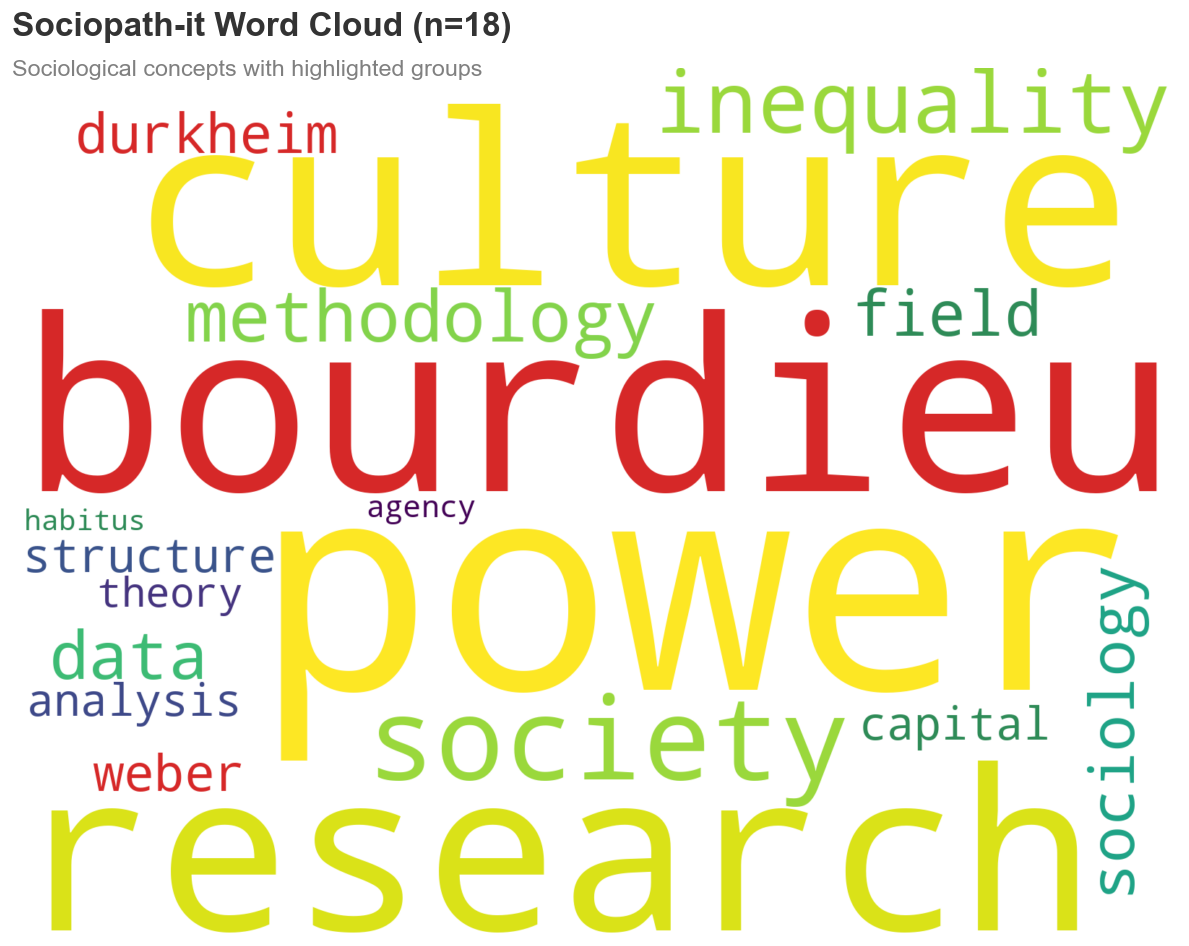

In [83]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import wordcloud as wordcloud_module

importlib.reload(wordcloud_module)
from sociopathit.visuals.wordcloud import wordcloud, wordcloud_interactive

# Simulate word frequency data
np.random.seed(42)
words = ["sociology", "theory", "methodology", "data", "analysis", "research", 
         "culture", "society", "inequality", "power", "structure", "agency",
         "capital", "field", "habitus", "bourdieu", "weber", "durkheim"]
freq_dict = {word: np.random.randint(10, 100) for word in words}

# Highlight groups
highlight_groups = {
    "Key Theorists": {
        "color": "#D62828",
        "words": ["bourdieu", "weber", "durkheim"]
    },
    "Core Concepts": {
        "color": "#2E8B57",
        "words": ["capital", "field", "habitus"]
    }
}

# ─────────────────────────────────────────────
# Test 1: Static wordcloud
# ─────────────────────────────────────────────
wordcloud(
    freq_dict=freq_dict,
    title="Sociopath-it Word Cloud",
    subtitle="Sociological concepts with highlighted groups",
    style_mode="viridis",
    highlight_groups=highlight_groups,
    use_gradient=True,
    max_words=50,
)

# ─────────────────────────────────────────────
# Test 2: Interactive wordcloud
# ─────────────────────────────────────────────
fig = wordcloud_interactive(
    freq_dict=freq_dict,
    title="Interactive Sociopath-it Word Cloud",
    style_mode="viridis",
    highlight_groups=highlight_groups,
    use_gradient=True,
    exact_words=18,
)
fig.show()